In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DAUP/supermarket_sales -.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
numeric_col= "Total"
df1 = df[numeric_col].dropna()

In [7]:
df1.head()

,Total
0,548.9715
1,80.2200
2,340.5255
3,489.0480
4,634.3785


In [8]:
mean_value =df1.mean()
std_value = df1.std()
print(f"Mean: {mean_value:.2f}, Stadard Deviation: {std_value:.2f}")

Mean: 322.97, Stadard Deviation: 245.89


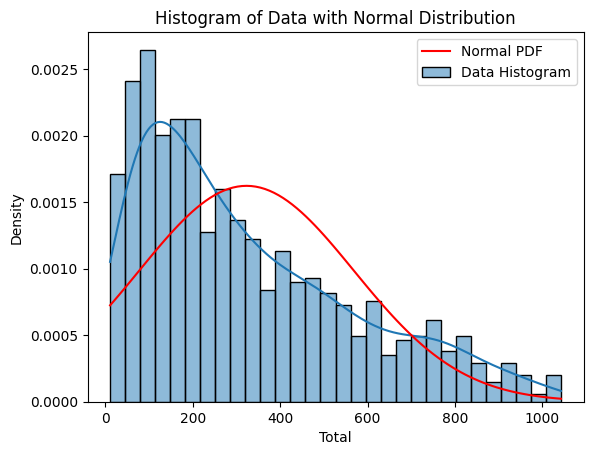

In [9]:
sns.histplot(df1,kde=True,stat="density",bins=30,label="Data Histogram")
x_vals=np.linspace(df1.min(),df1.max(),100)
plt.plot(x_vals,norm.pdf(x_vals,mean_value,std_value),'r-',label="Normal PDF")
plt.legend()
plt.title("Histogram of Data with Normal Distribution")
plt.show()

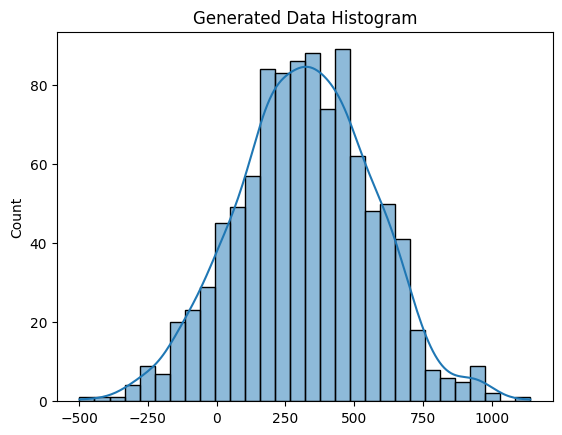

In [10]:
generated_data=np.random.normal(mean_value,std_value,1000)
sns.histplot(generated_data,kde=True,bins=30)
plt.title("Generated Data Histogram")
plt.show()

In [11]:
p_below_mean=norm.cdf(mean_value,mean_value,std_value)
print(f"P(X < mean)={p_below_mean:.4f}")
p95=norm.ppf(0.95,mean_value,std_value)
print(f"95th percentile={p95:.2f}")

P(X < mean)=0.5000
95th percentile=727.41


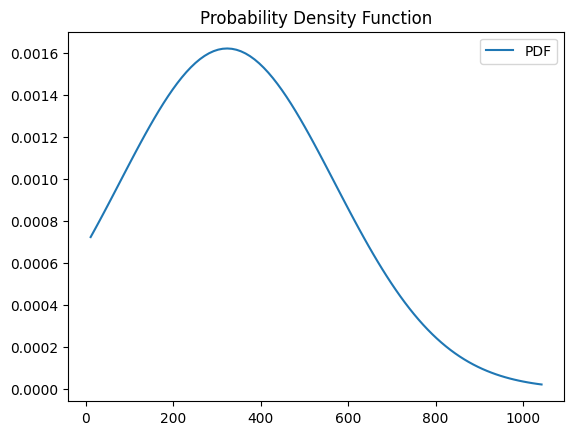

In [12]:
x_vals_pdf = np.linspace(df1.min(), df1.max(), 100)
#x_vals=np.linspace(df1.min(),df1.max(),100)
pdf_vals = norm.pdf(x_vals_pdf, mean_value, std_value)
plt.plot(x_vals_pdf, pdf_vals, label="PDF")
plt.title("Probability Density Function")
plt.legend()
plt.show()

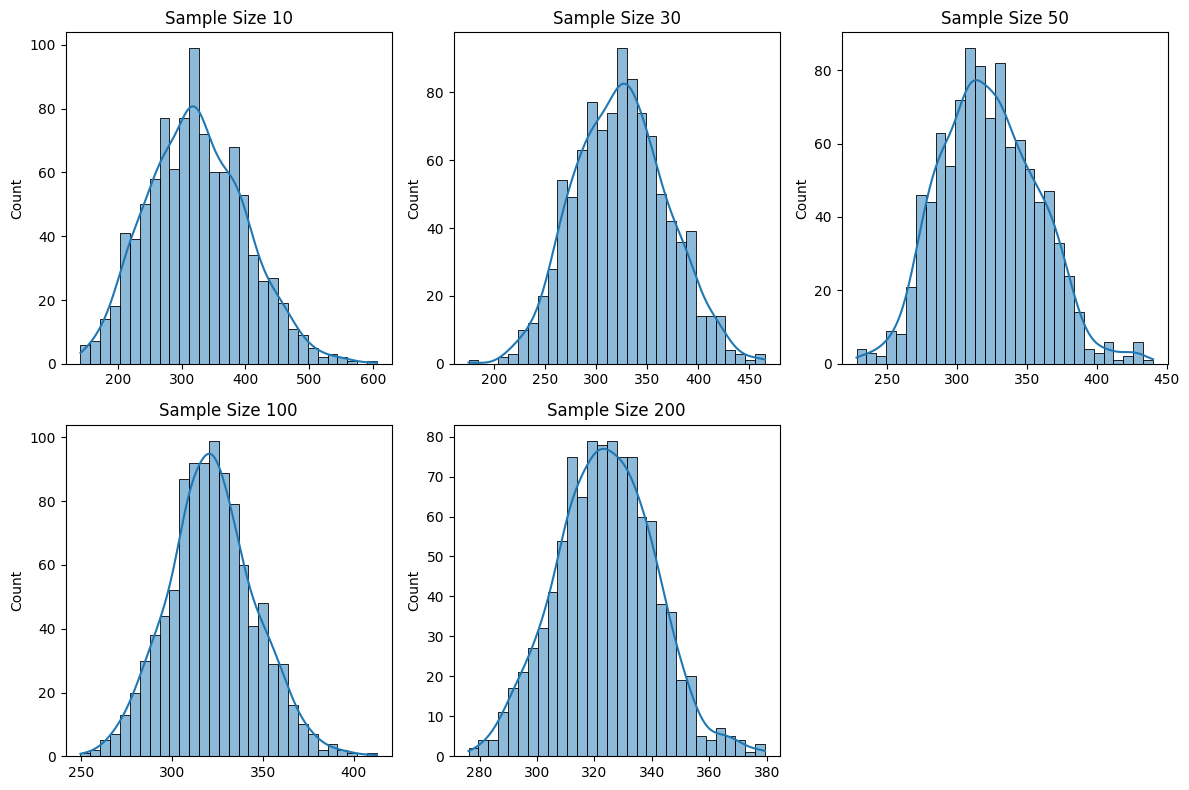

In [13]:
sample_sizes = [10, 30, 50, 100, 200]
plt.figure(figsize=(12, 8))
for i, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(df1, size=size, replace=True)) for _ in range(1000)]
    plt.subplot(2, 3, i + 1)
    sns.histplot(sample_means, bins=30, kde=True)
    plt.title(f"Sample Size {size}")
plt.tight_layout()
plt.show()

In [14]:
original_skew = skew(df1)
original_kurtosis = kurtosis(df1)
print(f"Original Data - Skewness: {original_skew:.2f}, Kurtosis: {original_kurtosis:.2f}")

for size in sample_sizes:
    sample_means = [np.mean(np.random.choice(df1, size=size, replace=True)) for _ in range(1000)]
    sample_skew = skew(sample_means)
    sample_kurt = kurtosis(sample_means)
    print(f"Sample Size {size} - Skewness: {sample_skew:.2f}, Kurtosis: {sample_kurt:.2f}")

Original Data - Skewness: 0.89, Kurtosis: -0.09
Sample Size 10 - Skewness: 0.30, Kurtosis: -0.02
Sample Size 30 - Skewness: 0.15, Kurtosis: 0.01
Sample Size 50 - Skewness: -0.02, Kurtosis: -0.05
Sample Size 100 - Skewness: 0.16, Kurtosis: 0.06
Sample Size 200 - Skewness: 0.11, Kurtosis: 0.16


In [15]:
target_percentile = norm.ppf(0.99, mean_value, std_value)
print(f"99% of observations fall below: {target_percentile:.2f}")

99% of observations fall below: 894.98
